In [1]:
# import library to load ".tab" files
import pandas as pd

# import library to visualise synthetic and UKHLS data
import matplotlib.pyplot as plt

# import OPENAI class to generate synthetic data
from openai import OpenAI

# import library to generate random numbers
import random

# import library to format synthetic data in JSON format. 
import json

# import OPENAI library to generate synthetic data
import openai

# import the library for Counter
from collections import Counter

# import backoff library to handle exponential exceptions
import backoff

# import the time library to measure the time taken to run the code
import time

# import wrap from textwrap
from textwrap import wrap

## Data Files Loading

In [2]:
def data_loading(filename, wave_of_study):
    """
    Description: This function loads the variables from a file from a specific wave of UKHLS study.
    Parameters:
    •	‘filename’ (string): the name of the file to be loaded. 
    •	‘wave_of_study’: determines which wave of UKHLS study to be loaded. 
    Returns:
    •	A list of relevant sample responses for comparing with the synthetic LLM values. 
    Raises:
    •	‘ValueError’ if wave of study or filename are not valid. 
    """
    if wave_of_study not in range(1, 14):
        raise ValueError("Invalid wave of study")

    if wave_of_study == 1:
        filename = 'a_' + filename
    elif wave_of_study == 2:
        filename = 'b_' + filename
    elif wave_of_study == 3:
        filename = 'c_' + filename
    elif wave_of_study == 4:
        filename = 'd_' + filename
    elif wave_of_study == 5:
        filename = 'e_' + filename
    elif wave_of_study == 6:
        filename = 'f_' + filename
    elif wave_of_study == 7:
        filename = 'g_' + filename
    elif wave_of_study == 8:
        filename = 'h_' + filename
    elif wave_of_study == 9:
        filename = 'i_' + filename
    elif wave_of_study == 10:
        filename = 'j_' + filename
    elif wave_of_study == 11:
        filename = 'k_' + filename
    elif wave_of_study == 12:
        filename = 'l_' + filename
    elif wave_of_study == 13:
        filename = 'm_' + filename

    return pd.read_csv('tab/ukhls/' + filename, sep='\t', low_memory=False) # test: set low_memory=False

In [3]:
def screen_environmental_views(data, letter, variable_names=None):
    """
    Dynamically screens environmental views based on specified variable prefixes in a DataFrame.

    Parameters:
    • data (DataFrame): The DataFrame containing the UKHLS data.
    • letter (str): The prefix for the variable names, indicating the wave of the study.
    • variable_names (list of str, optional): List of base variable names to be screened. If None, uses a default list.

    Returns:
    • dict: A dictionary of the environmental views with variables as keys and their data as values.
    """
    if variable_names is None:
        variable_names = [
            "scenv_bcon", "scenv_brit", "scenv_ccls", "scenv_cfit", 
            "scenv_chwo", "scenv_crlf", "scenv_dstr", "scenv_exag", 
            "scenv_ftst", "scenv_futr", "scenv_grn", "scenv_pmre", "scopecl30"
        ]

    environmental_views = {}

    for base_var in variable_names: # iterate through the base variable names
        full_var = f"{letter}_{base_var}" # initialise the variable names based on the wave of the study
        if full_var in data.columns: # if the variable is conducted in the study
            environmental_views[base_var] = data[full_var] # store the data in the dictionary
        else: # if the variable is not conducted in the study
            environmental_views[base_var] = None # store None in the dictionary

    return environmental_views

In [4]:
def load_profiling_data():

    # UKHLS profiling data loading examples
    first_wave_ukhls_indresp = data_loading('indresp.tab', 1) # Load the first wave data
    second_wave_ukhls_indresp = data_loading('indresp.tab', 2) # Load the second wave data
    third_wave_ukhls_indresp = data_loading('indresp.tab', 3) # Load the third wave data
    fourth_wave_ukhls_indresp = data_loading('indresp.tab', 4) # Load the fourth wave data
    fifth_wave_ukhls_indresp = data_loading('indresp.tab', 5) # Load the fifth wave data
    sixth_wave_ukhls_indresp = data_loading('indresp.tab', 6) # Load the sixth wave data
    seventh_wave_ukhls_indresp = data_loading('indresp.tab', 7) # Load the seventh wave data
    eighth_wave_ukhls_indresp = data_loading('indresp.tab', 8) # Load the eighth wave data
    ninth_wave_ukhls_indresp = data_loading('indresp.tab', 9) # Load the ninth wave data
    tenth_wave_ukhls_indresp = data_loading('indresp.tab', 10) # Load the tenth wave data
    eleventh_wave_ukhls_indresp = data_loading('indresp.tab', 11) # Load the eleventh wave data
    twelfth_wave_ukhls_indresp = data_loading('indresp.tab', 12) # Load the twelfth wave data
    thirteenth_wave_ukhls_indresp = data_loading('indresp.tab', 13) # Load the thirteenth wave data

    first_wave_ukhls_indall = data_loading('indall.tab', 1) # Load the first wave data
    second_wave_ukhls_indall = data_loading('indall.tab', 2) # Load the second wave data
    third_wave_ukhls_indall = data_loading('indall.tab', 3) # Load the third wave data
    fourth_wave_ukhls_indall = data_loading('indall.tab', 4) # Load the fourth wave data
    fifth_wave_ukhls_indall = data_loading('indall.tab', 5) # Load the fifth wave data
    sixth_wave_ukhls_indall = data_loading('indall.tab', 6) # Load the sixth wave data
    seventh_wave_ukhls_indall = data_loading('indall.tab', 7) # Load the seventh wave data
    eighth_wave_ukhls_indall = data_loading('indall.tab', 8) # Load the eighth wave data
    ninth_wave_ukhls_indall = data_loading('indall.tab', 9) # Load the ninth wave data
    tenth_wave_ukhls_indall = data_loading('indall.tab', 10) # Load the tenth wave data
    eleventh_wave_ukhls_indall = data_loading('indall.tab', 11) # Load the eleventh wave data
    twelfth_wave_ukhls_indall = data_loading('indall.tab', 12) # Load the twelfth wave data

    first_wave_ukhls_hhresp = data_loading('hhresp.tab', 1) # Load the first wave data
    second_wave_ukhls_hhresp = data_loading('hhresp.tab', 2) # Load the second wave data
    third_wave_ukhls_hhresp = data_loading('hhresp.tab', 3) # Load the third wave data
    fourth_wave_ukhls_hhresp = data_loading('hhresp.tab', 4) # Load the fourth wave data
    fifth_wave_ukhls_hhresp = data_loading('hhresp.tab', 5) # Load the fifth wave data
    sixth_wave_ukhls_hhresp = data_loading('hhresp.tab', 6) # Load the sixth wave data
    seventh_wave_ukhls_hhresp = data_loading('hhresp.tab', 7) # Load the seventh wave data
    eighth_wave_ukhls_hhresp = data_loading('hhresp.tab', 8) # Load the eighth wave data
    ninth_wave_ukhls_hhresp = data_loading('hhresp.tab', 9) # Load the ninth wave data
    tenth_wave_ukhls_hhresp = data_loading('hhresp.tab', 10) # Load the tenth wave data
    eleventh_wave_ukhls_hhresp = data_loading('hhresp.tab', 11) # Load the eleventh wave data
    twelfth_wave_ukhls_hhresp = data_loading('hhresp.tab', 12) # Load the twelfth wave data
    thirteenth_wave_ukhls_hhresp = data_loading('hhresp.tab', 13) # Load the thirteenth wave data

    indresp_data = [first_wave_ukhls_indresp, second_wave_ukhls_indresp, third_wave_ukhls_indresp, fourth_wave_ukhls_indresp, fifth_wave_ukhls_indresp, sixth_wave_ukhls_indresp, seventh_wave_ukhls_indresp, eighth_wave_ukhls_indresp, ninth_wave_ukhls_indresp, tenth_wave_ukhls_indresp, eleventh_wave_ukhls_indresp, twelfth_wave_ukhls_indresp, thirteenth_wave_ukhls_indresp]
    indall_data = [first_wave_ukhls_indall, second_wave_ukhls_indall, third_wave_ukhls_indall, fourth_wave_ukhls_indall, fifth_wave_ukhls_indall, sixth_wave_ukhls_indall, seventh_wave_ukhls_indall, eighth_wave_ukhls_indall, ninth_wave_ukhls_indall, tenth_wave_ukhls_indall, eleventh_wave_ukhls_indall, twelfth_wave_ukhls_indall]
    hhresp_data = [first_wave_ukhls_hhresp, second_wave_ukhls_hhresp, third_wave_ukhls_hhresp, fourth_wave_ukhls_hhresp, fifth_wave_ukhls_hhresp, sixth_wave_ukhls_hhresp, seventh_wave_ukhls_hhresp, eighth_wave_ukhls_hhresp, ninth_wave_ukhls_hhresp, tenth_wave_ukhls_hhresp, eleventh_wave_ukhls_hhresp, twelfth_wave_ukhls_hhresp, thirteenth_wave_ukhls_hhresp]

    return indresp_data, indall_data, hhresp_data

In [5]:
def load_environmental_views_data(first_wave_ukhls_indresp, fourth_wave_ukhls_indresp, tenth_wave_ukhls_indresp):
    # UKHLS environmental views screening examples
    # Screen the environmental views of the individuals in the first wave data
    first_wave_ukhls_environmental_views = screen_environmental_views(first_wave_ukhls_indresp, 'a') 
    # Screen the environmental views of the individuals in the fourth wave data
    fourth_wave_ukhls_environmental_views = screen_environmental_views(fourth_wave_ukhls_indresp, 'd')
    # Screen the environmental views of the individuals in the tenth wave data
    tenth_wave_ukhls_environmental_views = screen_environmental_views(tenth_wave_ukhls_indresp, 'j') 

    environmental_views_data = [first_wave_ukhls_environmental_views, fourth_wave_ukhls_environmental_views, tenth_wave_ukhls_environmental_views]

    return environmental_views_data

In [6]:
indresp_data, indall_data, hhresp_data = load_profiling_data()

In [7]:
first_wave_ukhls_indresp, fourth_wave_ukhls_indresp, tenth_wave_ukhls_indresp = indresp_data[0], indresp_data[3], indresp_data[9]

environmental_views_data = load_environmental_views_data(first_wave_ukhls_indresp, fourth_wave_ukhls_indresp, tenth_wave_ukhls_indresp)

## Profiling Conditioning Variables

### Income

#### Data Loading

In [14]:
income_variable_names = ["a_fihhmnlabgrs_dv", "b_fihhmnlabgrs_dv", "c_fihhmnlabgrs_dv", "d_fihhmnlabgrs_dv", "e_fihhmnlabgrs_dv", "f_fihhmnlabgrs_dv", "g_fihhmnlabgrs_dv", "h_fihhmnlabgrs_dv", "i_fihhmnlabgrs_dv", "j_fihhmnlabgrs_dv", "k_fihhmnlabgrs_dv", "l_fihhmnlabgrs_dv", "m_fihhmnlabgrs_dv"]

In [15]:
def load_income_distribution(data, variable_name):

    """
    Description: This function loads the monthly income distribution of the UKHLS data.
    Parameters:
    •	‘data’ (DataFrame): the UKHLS data.
    •	‘variable_name’ (string): the name of the variable to be loaded. 
    Returns:
    •	A list of monthly income values. 
    Raises:
    •	‘ValueError’ if the variable name is not valid. 
    """
    
    if variable_name not in data.columns:
        raise ValueError("Invalid variable name")
    
    income_data = data[variable_name]

    return income_data 

In [22]:
income_dicts = []

for i in range(len(hhresp_data)):

    income_dict = load_income_distribution(hhresp_data[i], income_variable_names[i])

    income_dicts.append(income_dict)

#### Data Visualisations

In [18]:
def plot_monthly_income_variable(data, wave_of_study, monthly_income_variable):
    """
    Description: This function plots the monthly income variable for a specific wave of UKHLS study. 
    Parameters:
    •	‘data’ (DataFrame): the UKHLS data to be plotted. 
    •	‘wave_of_study’ (int): the wave of UKHLS study to be plotted. 
    •	‘monthly_income_variable’ (string): the variable name for the monthly income. 
    Returns:
    •	A plot of the monthly income variable for a specific wave of UKHLS study. 
    Raises:
    •	‘ValueError’ if wave of study is not valid. 
    """
    if wave_of_study not in range(1, 14):
        raise ValueError("Invalid wave of study")

    if wave_of_study == 1:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the First Wave of UKHLS Study")
    elif wave_of_study == 2:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Second Wave of UKHLS Study")
    elif wave_of_study == 3:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Third Wave of UKHLS Study")
    elif wave_of_study == 4:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Fourth Wave of UKHLS Study")
    elif wave_of_study == 5:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Fifth Wave of UKHLS Study")
    elif wave_of_study == 6:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Sixth Wave of UKHLS Study")
    elif wave_of_study == 7:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Seventh Wave of UKHLS Study")
    elif wave_of_study == 8:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Eighth Wave of UKHLS Study")
    elif wave_of_study == 9:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Ninth Wave of UKHLS Study")
    elif wave_of_study == 10:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Tenth Wave of UKHLS Study")
    elif wave_of_study == 11:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Eleventh Wave of UKHLS Study")
    elif wave_of_study == 12:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Twelfth Wave of UKHLS Study")
    elif wave_of_study == 13:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Thirteenth Wave of UKHLS Study")

    plt.savefig(f"Figures/Profiling-Variables/Income/monthly_income_distribution_wave_{wave_of_study}.png")
    plt.show() 

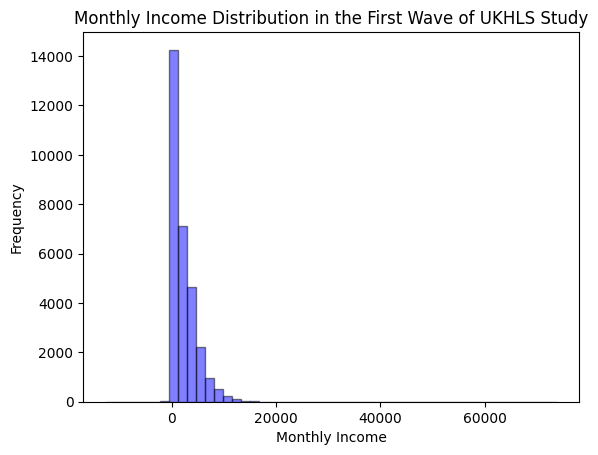

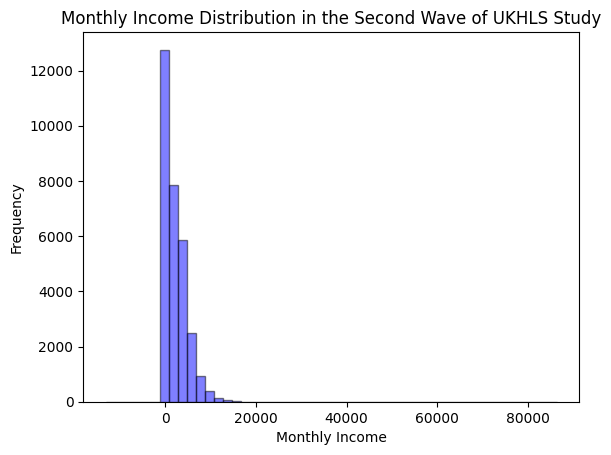

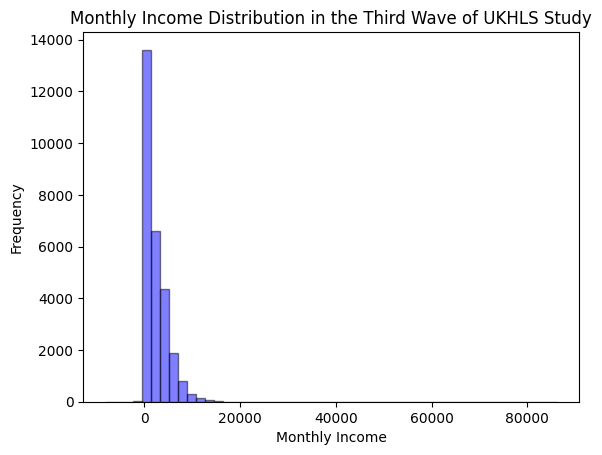

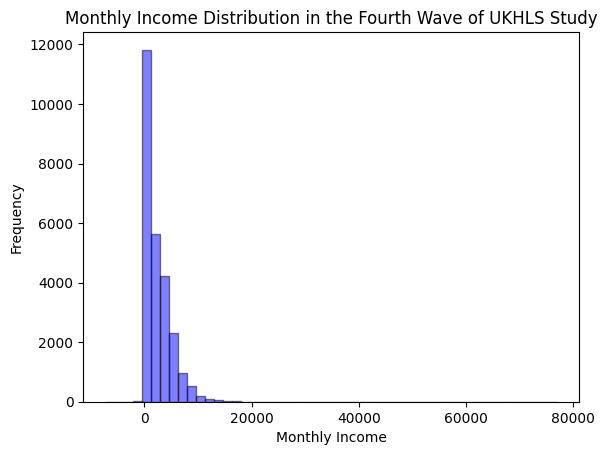

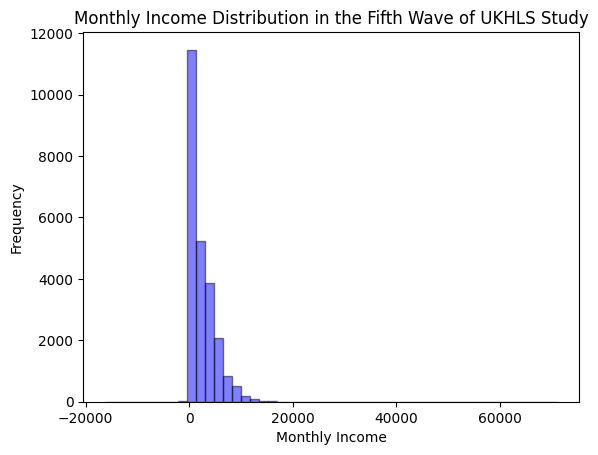

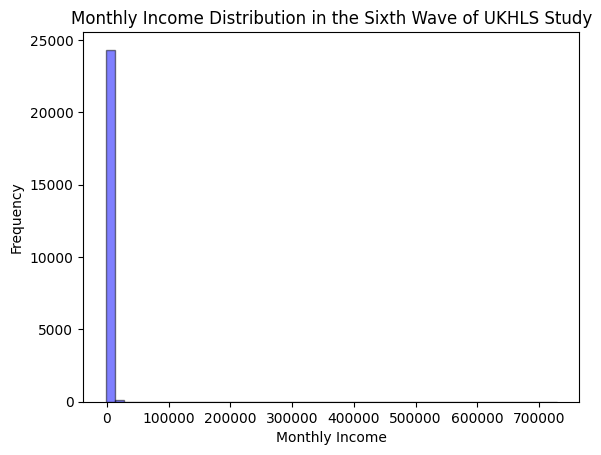

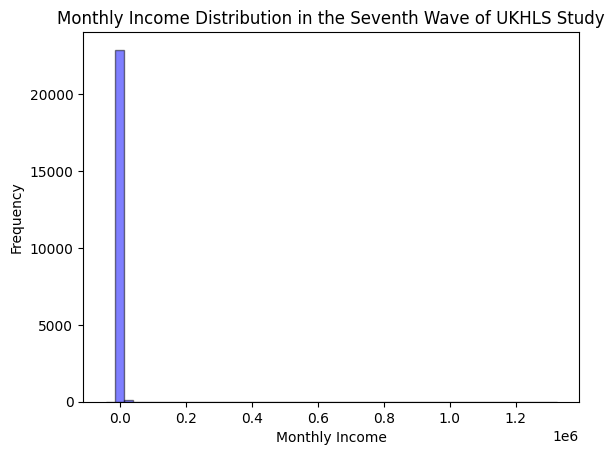

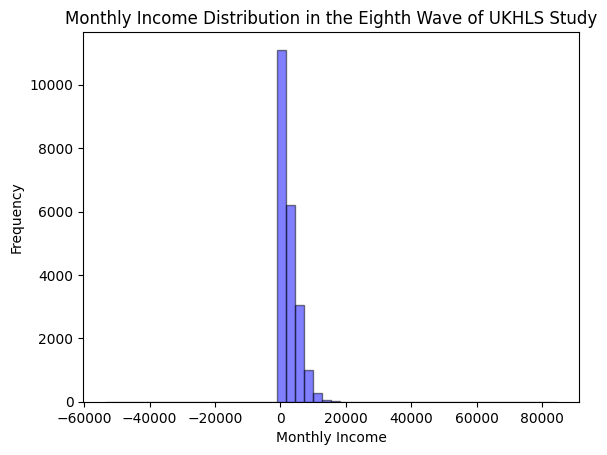

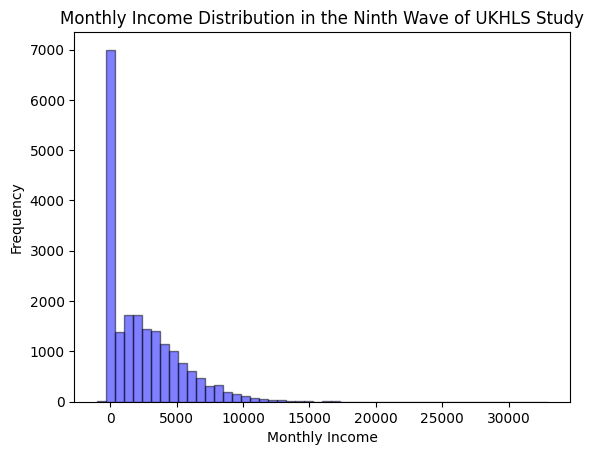

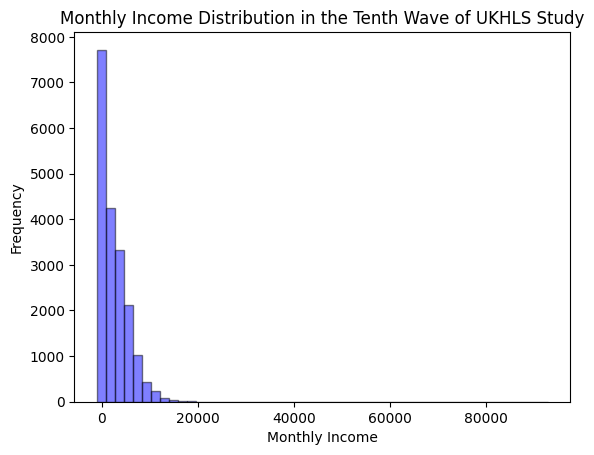

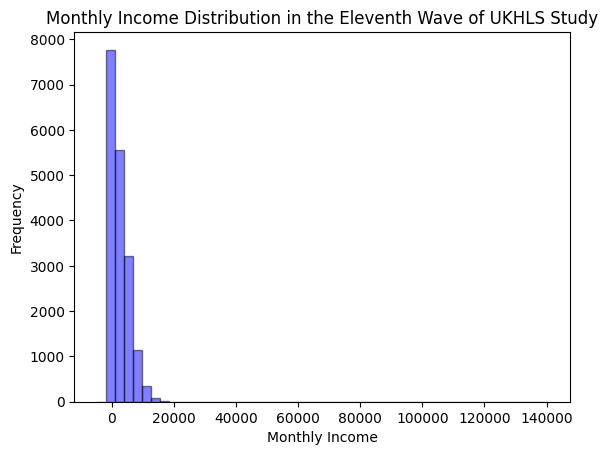

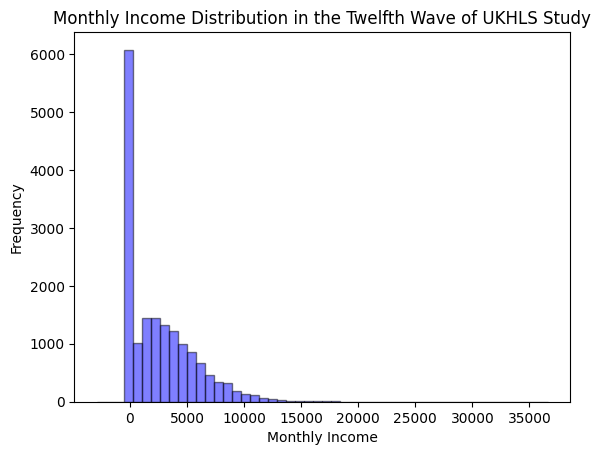

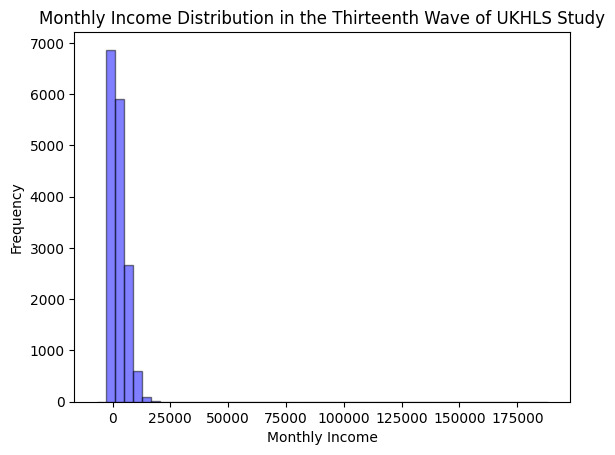

In [19]:
for i in range(len(hhresp_data)):
    plot_monthly_income_variable(hhresp_data[i], i+1, income_variable_names[i])

### Age Groups

#### Data Loading

In [23]:
def generate_age_group_distribution(dataframe, column_name):
    """
    Description: A function to generate the distribution of the age group in the UKHLS data.
    Parameters:
    •	‘dataframe’ (dataframe): the dataframe containing the UKHLS data.
    •	‘column_name’ (string): the name of the column containing the age group information.
    Returns:
    •	A probability distribution of the age group in the UKHLS data.
    """
    age_group_dict = {
        2: "10 - 19",
        3: "20 - 29",
        4: "30 - 39",
        5: "40 - 49",
        6: "50 - 59",
        7: "60 - 69",
        8: "70 years or older",
    }

    # use the mapping dictionary to convert the numeric codes to descriptive labels
    age_group_labels = dataframe[column_name].map(age_group_dict)

    age_group_probability_distribution = age_group_labels.value_counts(normalize=True)

    age_group_probability_dict = age_group_probability_distribution.to_dict()

    # ensure that all groups are included in the dictionary
    for key in age_group_dict.values():
        if key not in age_group_probability_dict:
            age_group_probability_dict[key] = 0

    return age_group_probability_dict

In [24]:
age_group_variable_names = ["a_agegr10_dv", "b_agegr10_dv", "c_agegr10_dv", "d_agegr10_dv", "e_agegr10_dv", "f_agegr10_dv", "g_agegr10_dv", "h_agegr10_dv", "i_agegr10_dv", "j_agegr10_dv", "k_agegr10_dv", "l_agegr10_dv", "m_agegr10_dv"]

In [25]:
age_group_dicts = []

for i in range(len(indresp_data)):
    age_group_dicts.append(generate_age_group_distribution(indresp_data[i], age_group_variable_names[i]))

#### Data Visualisations

In [26]:
# implement a function to visualise the probability distribution of the age group in the UKHLS data
def visualise_age_group_distribution(age_group_probability_dict, wave_number):
    """
    Description: A function to visualise the probability distribution of the age group in the UKHLS data.
    Parameters:
    •	‘age_group_distribution’ (dict): the probability distribution of the age group in the UKHLS data.
    •	‘wave_number’ (int): the wave number of the UKHLS data.
    """
    # display the probability distribution of the age group in the UKHLS data
    print(age_group_probability_dict)

    # sort the dictionary by the keys in order "10 - 19", "20 - 29", "30 - 39", "40 - 49", "50 - 59", "60 - 69", "70 years or older"
    age_group_probability_dict = dict(sorted(age_group_probability_dict.items()))

    # initialise the figure title for the plot based on the wave number
    if wave_number == 1:
        fig_title = "First Wave Age Group Probability Distribution"
    elif wave_number == 2:
        fig_title = "Second Wave Age Group Probability Distribution"
    elif wave_number == 3:
        fig_title = "Third Wave Age Group Probability Distribution"
    elif wave_number == 4:
        fig_title = "Fourth Wave Age Group Probability Distribution"
    elif wave_number == 5:
        fig_title = "Fifth Wave Age Group Probability Distribution"
    elif wave_number == 6:
        fig_title = "Sixth Wave Age Group Probability Distribution"
    elif wave_number == 7:
        fig_title = "Seventh Wave Age Group Probability Distribution"
    elif wave_number == 8:
        fig_title = "Eighth Wave Age Group Probability Distribution"
    elif wave_number == 9:
        fig_title = "Ninth Wave Age Group Probability Distribution"
    elif wave_number == 10:
        fig_title = "Tenth Wave Age Group Probability Distribution"
    elif wave_number == 11:
        fig_title = "Eleventh Wave Age Group Probability Distribution"
    elif wave_number == 12:
        fig_title = "Twelfth Wave Age Group Probability Distribution"
    elif wave_number == 13:
        fig_title = "Thirteenth Wave Age Group Probability Distribution"
    elif wave_number == 14:
        fig_title = "Average Age Group Probability Distribution across 13 Waves of UKHLS Study"

    # plot the age_group_probability_dict
    plt.bar(age_group_probability_dict.keys(), age_group_probability_dict.values())
    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks(rotation=90)
    plt.xlabel('Age Group')
    plt.ylabel('Probability')
    plt.title(fig_title, fontsize=10)
    plt.tight_layout() # adjust the plot to fit the labels

    if wave_number == 1: 
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - First Wave.png")
    elif wave_number == 2:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Second Wave.png")
    elif wave_number == 3:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Third Wave.png")
    elif wave_number == 4:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Fourth Wave.png")
    elif wave_number == 5:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Fifth Wave.png")
    elif wave_number == 6:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Sixth Wave.png")
    elif wave_number == 7:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Seventh Wave.png")
    elif wave_number == 8:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Eighth Wave.png")
    elif wave_number == 9:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Ninth Wave.png")
    elif wave_number == 10:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Tenth Wave.png")
    elif wave_number == 11:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Eleventh Wave.png")
    elif wave_number == 12:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Twelfth Wave.png")
    elif wave_number == 13:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Thirteenth Wave.png")
    elif wave_number == 14:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Average.png")
    
    plt.show()

{'40 - 49': 0.1902968976742362, '30 - 39': 0.18268815939130092, '20 - 29': 0.1599011648429227, '50 - 59': 0.15070400439267365, '60 - 69': 0.13123112523041927, '70 years or older': 0.1187002392438326, '10 - 19': 0.06647840922461466}


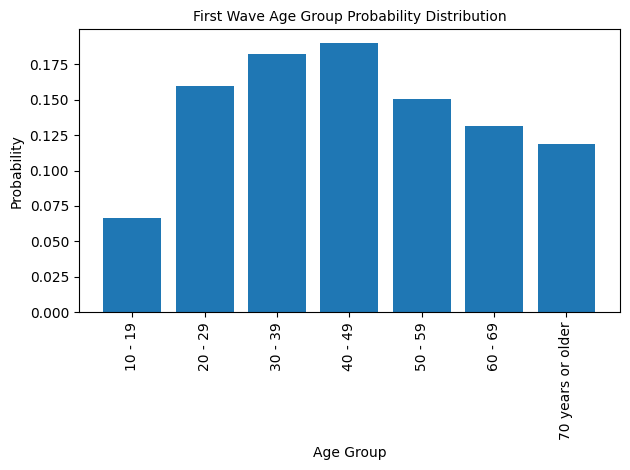

{'40 - 49': 0.19018820899078198, '30 - 39': 0.17034104861912877, '50 - 59': 0.15725621712756793, '20 - 29': 0.14237542837245953, '60 - 69': 0.14023127531291807, '70 years or older': 0.1296937709604706, '10 - 19': 0.06991405061667308}


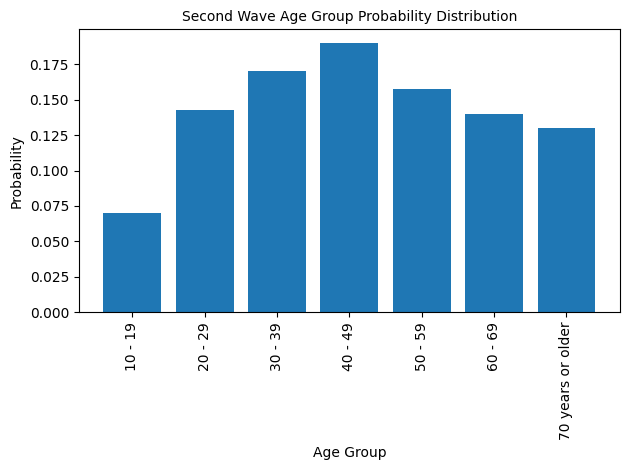

{'40 - 49': 0.19051739751665292, '30 - 39': 0.16336962427803828, '50 - 59': 0.16097482441488398, '60 - 69': 0.14479483206214405, '20 - 29': 0.13779155179006258, '70 years or older': 0.1345917771829909, '10 - 19': 0.06795999275522731}


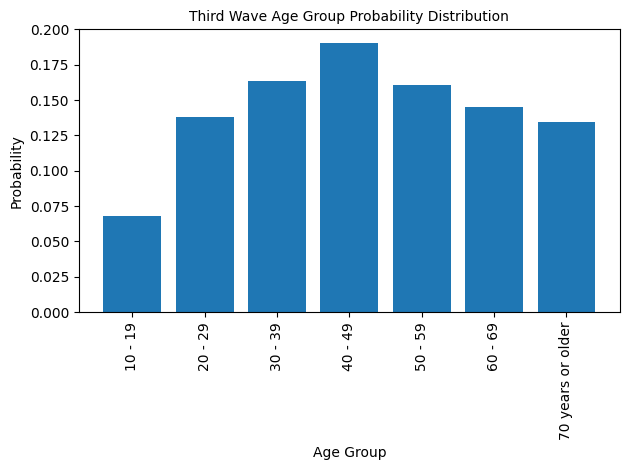

{'40 - 49': 0.18940391723669117, '50 - 59': 0.16518672728045206, '30 - 39': 0.1574754641628075, '60 - 69': 0.14545184178102563, '20 - 29': 0.13737944512894593, '70 years or older': 0.1369333389981731, '10 - 19': 0.06816926541190466}


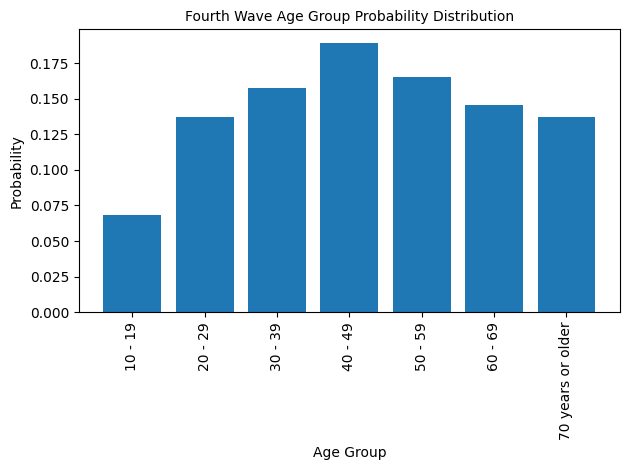

{'40 - 49': 0.1860293953654348, '50 - 59': 0.16760711019916585, '30 - 39': 0.15103597475299418, '60 - 69': 0.14806967459910342, '70 years or older': 0.1428953765863015, '20 - 29': 0.1367174431830854, '10 - 19': 0.06764502531391485}


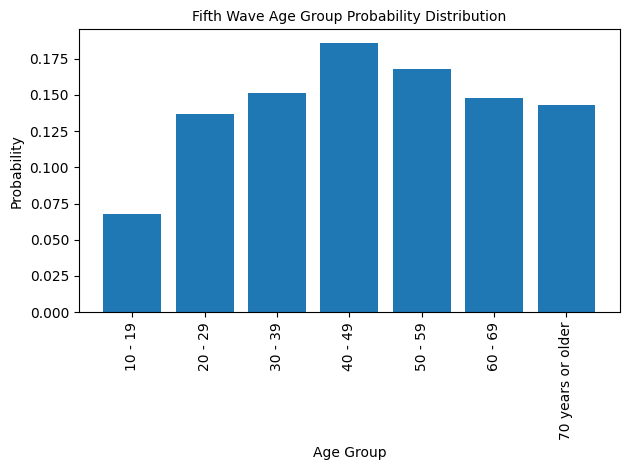

{'40 - 49': 0.18596258164507914, '50 - 59': 0.16678844237794752, '30 - 39': 0.1572013727443817, '60 - 69': 0.14311967231263145, '20 - 29': 0.14183549208457877, '70 years or older': 0.1409941326248201, '10 - 19': 0.06409830621056127}


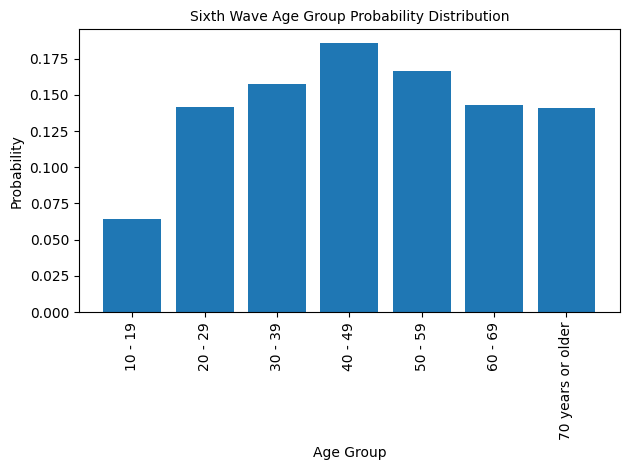

{'40 - 49': 0.18168235824222734, '50 - 59': 0.1716033865344938, '30 - 39': 0.1542438399696445, '60 - 69': 0.14748500011857613, '70 years or older': 0.1470581260227192, '20 - 29': 0.13520051224891502, '10 - 19': 0.06272677686342401}


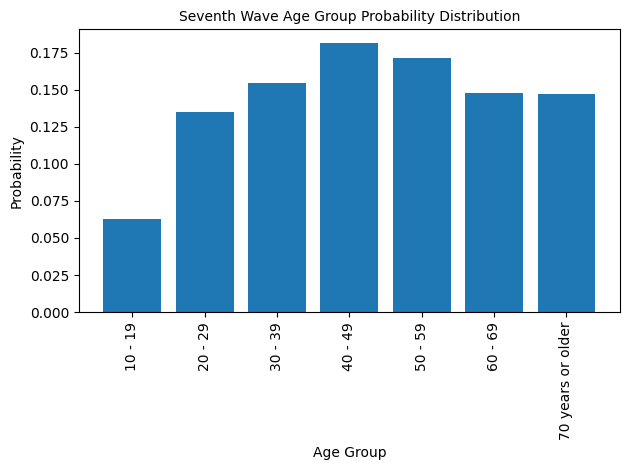

{'40 - 49': 0.17776250827098286, '50 - 59': 0.17641370183743066, '70 years or older': 0.1576831068356492, '60 - 69': 0.14979386165826844, '30 - 39': 0.14880134371659795, '20 - 29': 0.13027434213874892, '10 - 19': 0.05927113554232198}


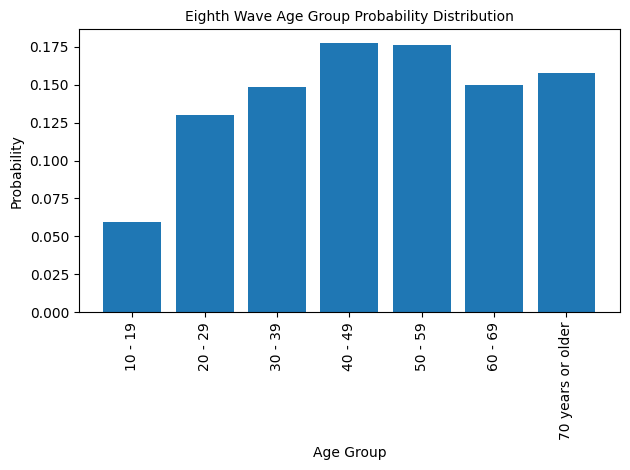

{'50 - 59': 0.18135174862024017, '40 - 49': 0.17114568599717114, '70 years or older': 0.16759575117175582, '60 - 69': 0.15298000388274122, '30 - 39': 0.14086030451784673, '20 - 29': 0.12796405690989268, '10 - 19': 0.05810244890035222}


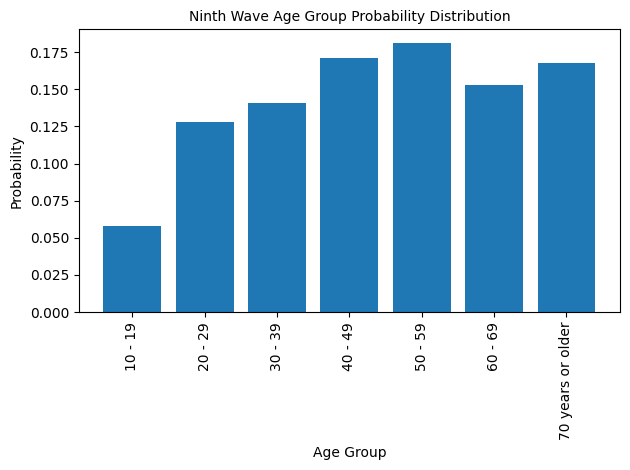

{'50 - 59': 0.1842527027420812, '70 years or older': 0.1776670454876592, '40 - 49': 0.16723489815543316, '60 - 69': 0.15383046303581316, '30 - 39': 0.13529737447912113, '20 - 29': 0.12515662791036514, '10 - 19': 0.05656088818952706}


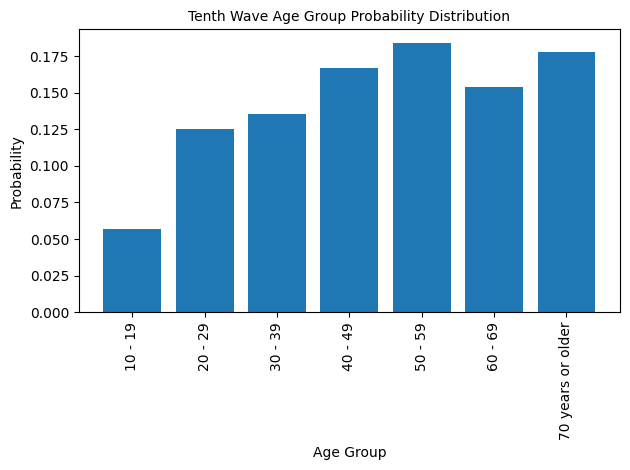

{'50 - 59': 0.18657042869641294, '70 years or older': 0.18272715910511186, '40 - 49': 0.16404199475065617, '60 - 69': 0.15832395950506187, '30 - 39': 0.12851518560179978, '20 - 29': 0.12723409573803274, '10 - 19': 0.05258717660292463}


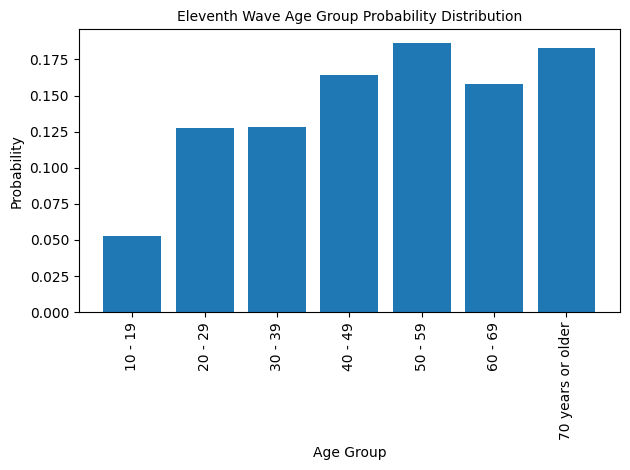

{'50 - 59': 0.18918272516058493, '70 years or older': 0.18463851305179718, '60 - 69': 0.16748667486674867, '40 - 49': 0.15983326499931666, '20 - 29': 0.12583709170425036, '30 - 39': 0.12481208145414788, '10 - 19': 0.0482096487631543}


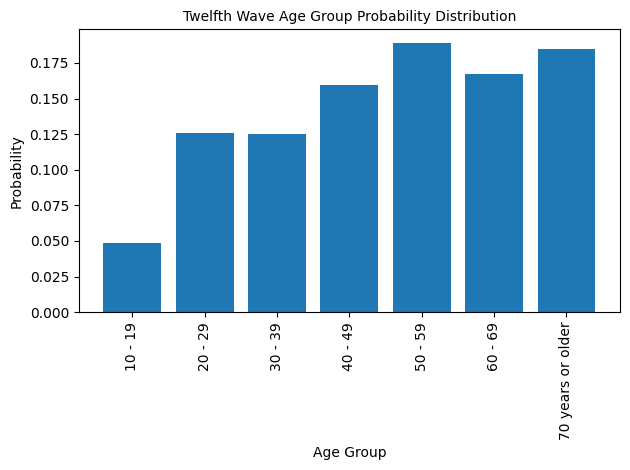

{'50 - 59': 0.19037754045076258, '70 years or older': 0.1876629638889881, '60 - 69': 0.17058970603993284, '40 - 49': 0.15819552094867306, '20 - 29': 0.12569203843268922, '30 - 39': 0.12237025395578098, '10 - 19': 0.0451119762831732}


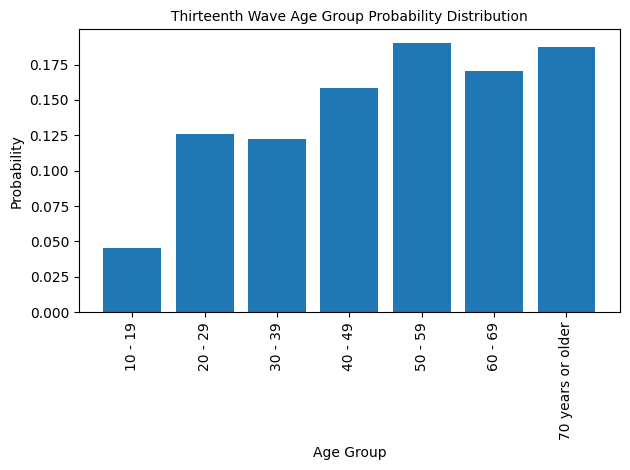

In [27]:
for i in range(len(indresp_data)):
    visualise_age_group_distribution(age_group_dicts[i], i+1)

#### Save Data

In [28]:
# save the age group probability distribution across 13 waves of UKHLS study as JSON files 
for i in range(len(indresp_data)):
    with open(f"UKHLS-Profiling-Data/Age Groups/Age Group Probability Distribution - Wave {i+1}.json", "w") as file:
        json.dump(age_group_dicts[i], file)

### Highest Qualification Levels

#### Data Loading

In [29]:
def generate_highest_education_levels_distribution(dataframe, column_name):
    """
    Generate a probability distribution of the highest education levels in a given dataframe.

    Args:
        dataframe (pandas.DataFrame): The dataframe containing the education level data.
        column_name (str): The name of the column in the dataframe that contains the education level codes.

    Returns:
        dict: A dictionary representing the probability distribution of the highest education levels.
              The keys are the descriptive labels of the education levels, and the values are the probabilities.
    """

    # remove the values -9, -2, and -1 from the dataframe
    dataframe = dataframe[dataframe[column_name] > 0]

    education_levels_dict = {
        1: "university",
        2: "foundation",
        3: "diploma",
        4: "teaching qualification",
        5: "nursing",
        6: "a level",
        7: "welsh ba",
        8: "international ba",
        9: "as level",
        10: "higher grade", 
        11: "sixth year certificate",
        12: "GCSE",
        13: "CSE",
        14: "O grade",
        15: "Other",
        96: "None"
    }

    # use the mapping dictionary to convert the numeric codes to descriptive labels
    education_levels_labels = dataframe[column_name].map(education_levels_dict)

    education_levels_probability_distribution = education_levels_labels.value_counts(normalize=True)

    education_levels_probability_dict = education_levels_probability_distribution.to_dict()

    return education_levels_probability_dict

In [30]:
qualification_variable_names = ["a_qfhigh", "b_qfhigh", "c_qfhigh", "d_qfhigh", "e_qfhigh", "f_qfhigh", "g_qfhigh", "h_qfhigh", "i_qfhigh", "j_qfhigh", "k_qfhigh", "l_qfhigh", "m_qfhigh"]

In [31]:
qualification_probability_dicts = []

for i in range(len(indresp_data)):

    qualification_probability_dicts.append(generate_highest_education_levels_distribution(indresp_data[i], qualification_variable_names[i]))


#### Data Visualisations

In [32]:
def visualise_education_levels_probability_dict(education_levels_probability_dict, wave_number):
    """
    Description: A function to visualise the probability distribution of the education levels in the UKHLS data.
    Parameters:
    •	‘education_levels_probability_dict’ (dict): the probability distribution of the education levels in the UKHLS data.
    •	‘wave_number’ (int): the wave number of the UKHLS data.
    """
    # display the probability distribution of the education levels in the UKHLS data
    print(education_levels_probability_dict)

    if wave_number == 1:
        fig_title = "First Wave Education Level Probability Distribution"
    elif wave_number == 2:
        fig_title = "Second Wave Education Level Probability Distribution"
    elif wave_number == 3:
        fig_title = "Third Wave Education Level Probability Distribution"
    elif wave_number == 4:
        fig_title = "Fourth Wave Education Level Probability Distribution"
    elif wave_number == 5:
        fig_title = "Fifth Wave Education Level Probability Distribution"
    elif wave_number == 6:
        fig_title = "Sixth Wave Education Level Probability Distribution"
    elif wave_number == 7:
        fig_title = "Seventh Wave Education Level Probability Distribution"
    elif wave_number == 8:
        fig_title = "Eighth Wave Education Level Probability Distribution"
    elif wave_number == 9:
        fig_title = "Ninth Wave Education Level Probability Distribution"
    elif wave_number == 10:
        fig_title = "Tenth Wave Education Level Probability Distribution"
    elif wave_number == 11:
        fig_title = "Eleventh Wave Education Level Probability Distribution"
    elif wave_number == 12:
        fig_title = "Twelfth Wave Education Level Probability Distribution"
    elif wave_number == 13:
        fig_title = "Thirteenth Wave Education Level Probability Distribution"
    elif wave_number == 14:
        fig_title = "Average Education Level Probability Distribution across 13 Waves of UKHLS Study"

    qualification_order = [
        "None",
        "Other",
        "O grade",
        "CSE",
        "GCSE",
        "as level",
        "a level",
        "foundation",
        "diploma",
        "teaching qualification",
        "nursing",
        "higher grade",
        "welsh ba",
        "international ba",
        "university",
        "sixth year certificate"
    ]

    qualificiation_order_indexes = [0, 1, 2, 3, 4, 9, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15]

    # Create a sorted dictionary according to the predefined order
    sorted_education_levels = {key: education_levels_probability_dict[key] for key in qualification_order if key in education_levels_probability_dict}

    # plot the education_levels_probability_dict
    plt.bar(sorted_education_levels.keys(), sorted_education_levels.values())
    # rotate the x-axis labels to 90 degrees to make them more readable

    qualification_order = ['\n'.join(wrap(l, 12)) for l in qualification_order]

    plt.xticks(qualificiation_order_indexes, qualification_order, rotation=90, fontsize=8)
    plt.xlabel('Education Level')
    plt.ylabel('Probability')
    plt.title(fig_title, fontsize=10)
    plt.tight_layout() # adjust the plot to fit the labels
    
    if wave_number != 14:
        plt.savefig(f"Figures/Profiling-Variables/Education Levels/Education Level Probability Distribution - Wave {wave_number}.png")
    else:
        plt.savefig("Figures/Profiling-Variables/Education Levels/Average Education Level Probability Distribution.png")
    
    plt.show()

{'None': 0.2781326781326781, 'GCSE': 0.22052088452088453, 'foundation': 0.1291203931203931, 'university': 0.0861916461916462, 'a level': 0.08357739557739557, 'diploma': 0.06044226044226044, 'CSE': 0.03917444717444717, 'Other': 0.028383292383292385, 'nursing': 0.018791154791154792, 'O grade': 0.015213759213759214, 'teaching qualification': 0.01423095823095823, 'as level': 0.012108108108108109, 'higher grade': 0.00965110565110565, 'sixth year certificate': 0.0028304668304668305, 'international ba': 0.001533169533169533, 'welsh ba': 9.828009828009828e-05}


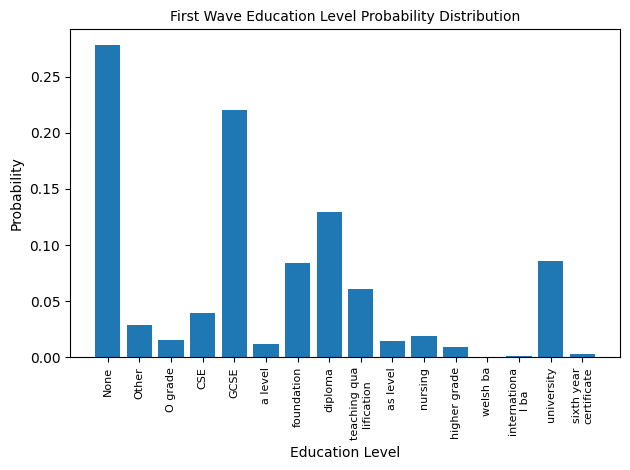

{'GCSE': 0.2856390680531789, 'None': 0.2269316835592997, 'foundation': 0.10885876003685666, 'a level': 0.1030670001316309, 'university': 0.08937738581018823, 'diploma': 0.049756482822166645, 'CSE': 0.032512834013426355, 'Other': 0.023430301434776885, 'as level': 0.022377254179281294, 'O grade': 0.019349743319731473, 'higher grade': 0.015664077925496907, 'nursing': 0.009477425299460314, 'teaching qualification': 0.008950901671712518, 'sixth year certificate': 0.0023693563248650784, 'international ba': 0.0017112017901803344, 'welsh ba': 0.0005265236277477951}


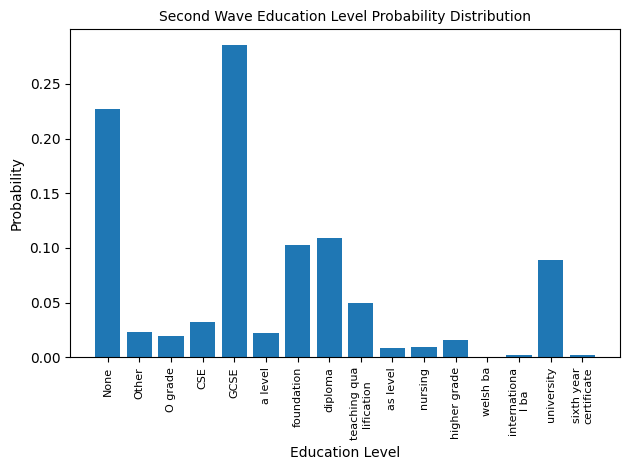

{'GCSE': 0.31473718155433733, 'None': 0.23363431151241534, 'foundation': 0.09916156078684295, 'a level': 0.09722670106417285, 'university': 0.0928732666881651, 'diploma': 0.042244437278297325, 'CSE': 0.029506610770719123, 'as level': 0.02273460174137375, 'Other': 0.018864882296033537, 'O grade': 0.01596259271202838, 'higher grade': 0.013544018058690745, 'nursing': 0.009029345372460496, 'teaching qualification': 0.005320864237342793, 'sixth year certificate': 0.003547242824895195, 'international ba': 0.0009674298613350532, 'welsh ba': 0.0006449532408900354}


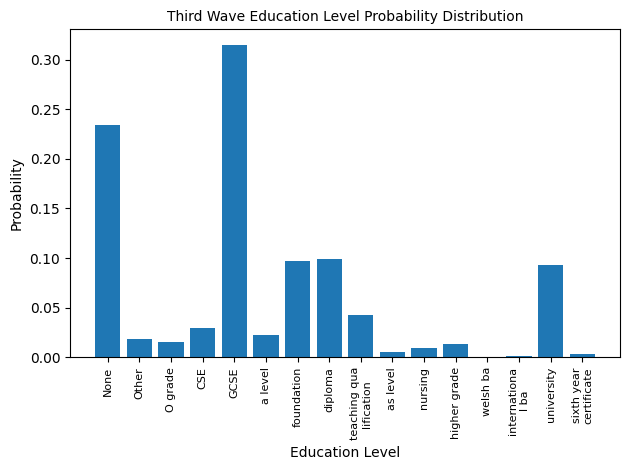

{'GCSE': 0.40894568690095845, 'None': 0.17465388711395102, 'foundation': 0.09336173233936812, 'a level': 0.09123180688675896, 'university': 0.07170749023784168, 'diploma': 0.04472843450479233, 'as level': 0.0291089811856585, 'CSE': 0.022009229676961305, 'O grade': 0.02023429179978701, 'Other': 0.01668441604543841, 'higher grade': 0.012069577564785232, 'teaching qualification': 0.006034788782392616, 'nursing': 0.005324813631522897, 'sixth year certificate': 0.002129925452609159, 'welsh ba': 0.0010649627263045794, 'international ba': 0.0007099751508697196}


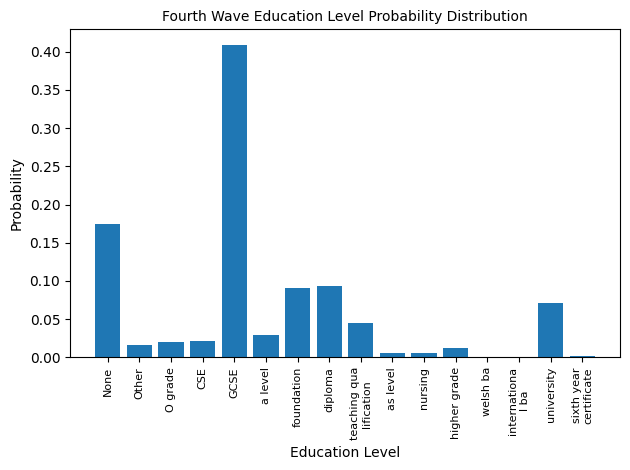

{'GCSE': 0.42214380238200266, 'None': 0.18173797970886635, 'foundation': 0.08998676665196295, 'a level': 0.07895897662108513, 'university': 0.07190119100132333, 'as level': 0.031760035288928096, 'diploma': 0.030436700485222762, 'O grade': 0.029554477282752536, 'Other': 0.018526687251874726, 'higher grade': 0.017203352448169385, 'CSE': 0.016321129245699163, 'nursing': 0.0035288928098809, 'sixth year certificate': 0.0030877812086457872, 'teaching qualification': 0.002646669607410675, 'welsh ba': 0.0022055580061755625}


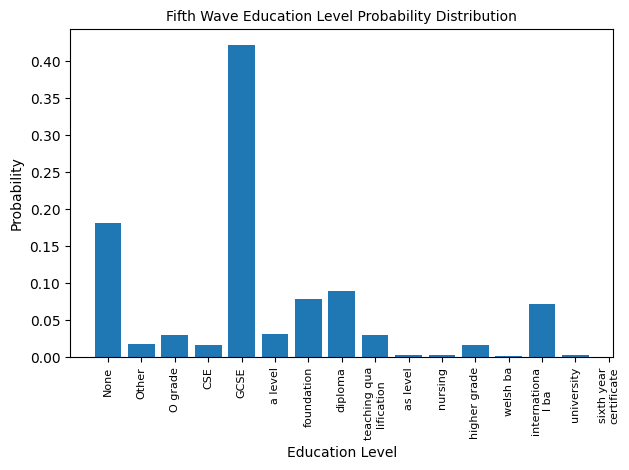

{'GCSE': 0.28829993535875886, 'foundation': 0.14652014652014653, 'a level': 0.12561947856065503, 'None': 0.12303382891618185, 'university': 0.12066365007541478, 'diploma': 0.09459168282697694, 'as level': 0.022408963585434174, 'CSE': 0.020900667959491488, 'Other': 0.0196078431372549, 'O grade': 0.012281835811247576, 'nursing': 0.007972419737125619, 'higher grade': 0.007326007326007326, 'teaching qualification': 0.004093945270415859, 'sixth year certificate': 0.004093945270415859, 'international ba': 0.002370178840767076, 'welsh ba': 0.00021547080370609782}


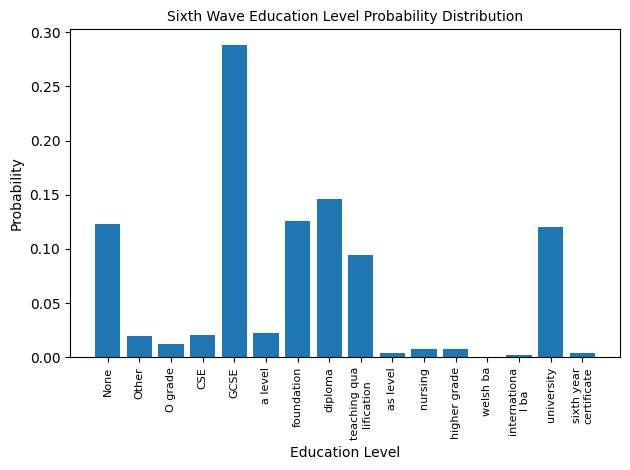

{'GCSE': 0.3334735071488646, 'None': 0.20815811606391926, 'foundation': 0.11816652649285113, 'a level': 0.09461732548359966, 'university': 0.08074011774600505, 'diploma': 0.059293523969722456, 'as level': 0.026492851135407905, 'Other': 0.025231286795626577, 'O grade': 0.01808242220353238, 'CSE': 0.01345668629100084, 'higher grade': 0.008410428931875526, 'nursing': 0.0054667788057190915, 'sixth year certificate': 0.004625735912531539, 'teaching qualification': 0.002523128679562658, 'international ba': 0.001261564339781329}


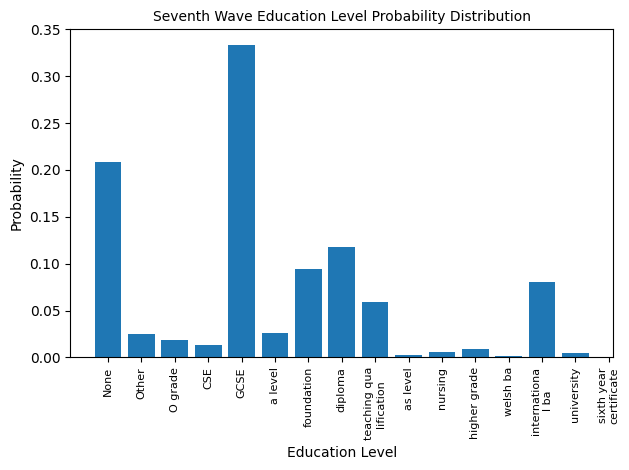

{'GCSE': 0.37030812324929974, 'None': 0.20840336134453782, 'foundation': 0.1103641456582633, 'a level': 0.08739495798319327, 'university': 0.0773109243697479, 'diploma': 0.047058823529411764, 'as level': 0.025210084033613446, 'Other': 0.020168067226890758, 'O grade': 0.016246498599439777, 'CSE': 0.013445378151260505, 'higher grade': 0.012324929971988795, 'teaching qualification': 0.0056022408963585435, 'nursing': 0.004481792717086834, 'sixth year certificate': 0.0011204481792717086, 'international ba': 0.0005602240896358543}


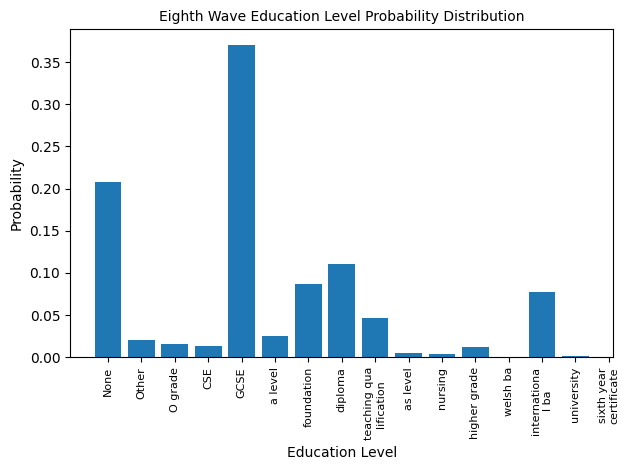

{'GCSE': 0.4488888888888889, 'None': 0.21866666666666668, 'a level': 0.08, 'university': 0.06133333333333333, 'diploma': 0.048, 'as level': 0.037333333333333336, 'CSE': 0.032, 'O grade': 0.027555555555555555, 'foundation': 0.014222222222222223, 'higher grade': 0.014222222222222223, 'Other': 0.011555555555555555, 'nursing': 0.005333333333333333, 'international ba': 0.0008888888888888889}


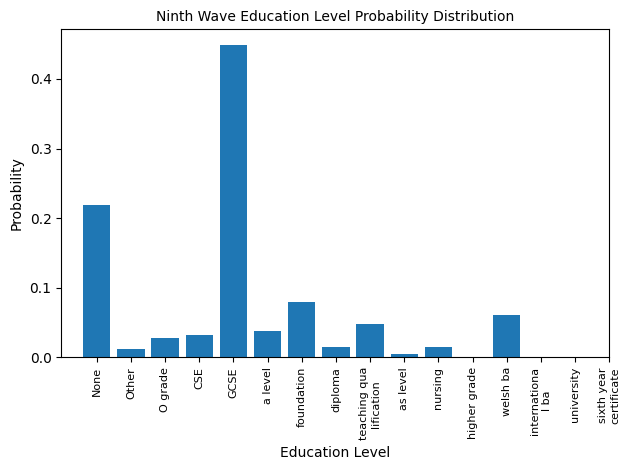

{'GCSE': 0.480225988700565, 'None': 0.2192090395480226, 'a level': 0.0903954802259887, 'university': 0.0576271186440678, 'diploma': 0.04180790960451977, 'O grade': 0.02937853107344633, 'as level': 0.02711864406779661, 'higher grade': 0.01807909604519774, 'CSE': 0.011299435028248588, 'Other': 0.010169491525423728, 'foundation': 0.00903954802259887, 'nursing': 0.004519774011299435, 'international ba': 0.0011299435028248588}


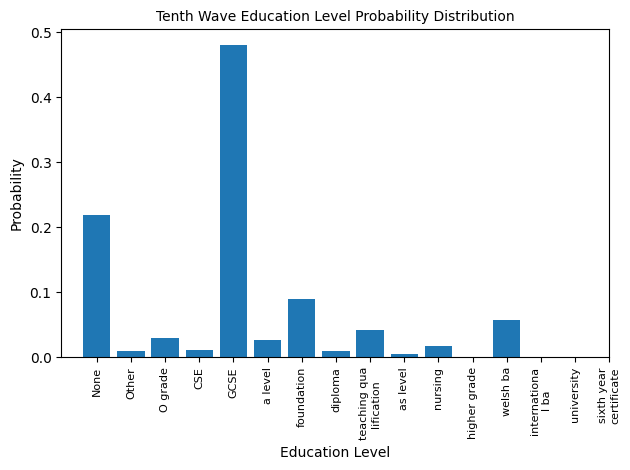

{'GCSE': 0.5239852398523985, 'None': 0.1795817958179582, 'a level': 0.0897908979089791, 'university': 0.05781057810578106, 'diploma': 0.055350553505535055, 'higher grade': 0.020910209102091022, 'O grade': 0.01968019680196802, 'Other': 0.012300123001230012, 'CSE': 0.012300123001230012, 'foundation': 0.008610086100861008, 'nursing': 0.007380073800738007, 'as level': 0.007380073800738007, 'sixth year certificate': 0.0024600246002460025, 'welsh ba': 0.0012300123001230013, 'teaching qualification': 0.0012300123001230013}


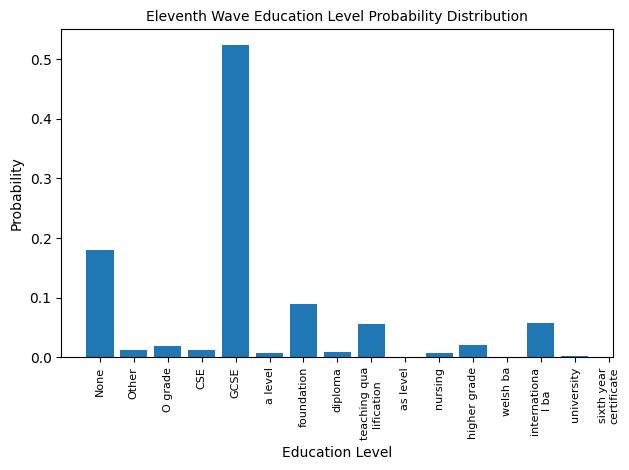

{'GCSE': 0.5367892976588629, 'None': 0.18896321070234115, 'a level': 0.07525083612040134, 'university': 0.046822742474916385, 'diploma': 0.0451505016722408, 'O grade': 0.026755852842809364, 'as level': 0.023411371237458192, 'higher grade': 0.016722408026755852, 'Other': 0.011705685618729096, 'CSE': 0.011705685618729096, 'foundation': 0.008361204013377926, 'nursing': 0.006688963210702341, 'sixth year certificate': 0.0016722408026755853}


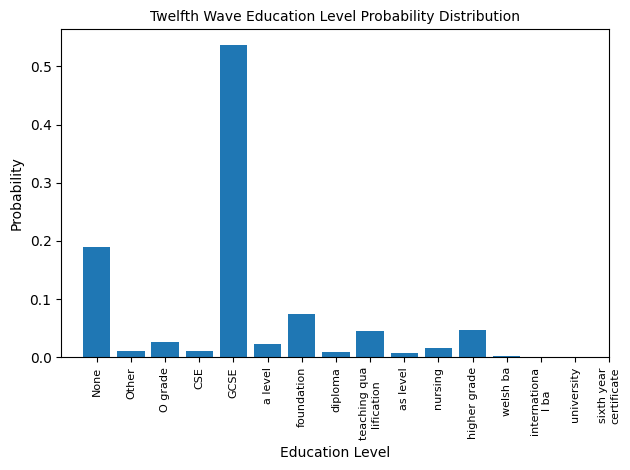

{'GCSE': 0.4984076433121019, 'None': 0.18630573248407642, 'a level': 0.12101910828025478, 'university': 0.042993630573248405, 'diploma': 0.03980891719745223, 'O grade': 0.027070063694267517, 'as level': 0.020700636942675158, 'Other': 0.01751592356687898, 'CSE': 0.014331210191082803, 'higher grade': 0.012738853503184714, 'sixth year certificate': 0.006369426751592357, 'nursing': 0.006369426751592357, 'foundation': 0.006369426751592357}


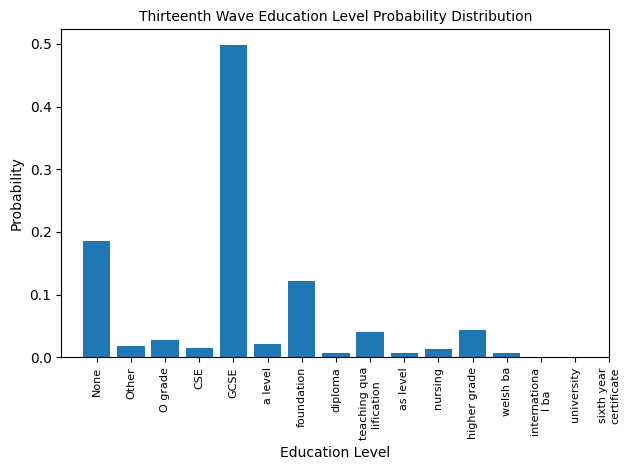

In [33]:
for i in range(len(indresp_data)):
    visualise_education_levels_probability_dict(qualification_probability_dicts[i], i+1)

#### Save Data

In [35]:
# save the age group probability distribution across 13 waves of UKHLS study as JSON files 
for i in range(len(indresp_data)):
    with open(f"UKHLS-Profiling-Data/Highest Qualifications/Highest Qualifications Probability Distribution - Wave {i+1}.json", "w") as file:
        json.dump(qualification_probability_dicts[i], file)